# Analysing experiments

This notebook accompanies the AAAI 2021 submission 
_Practical and Rigorous Uncertainty Bounds for Gaussian Process Regression_.

Here we analyse the results of the numerical experiments. The results have to be contained in a
directory (in the same directory as this notebook) named by the tag of the experiment.
As an alternative, the corresponding directory can be changed for each experiment (argument for
function load_failures_and_scalings or output_dir for Experiment 1_4_c).

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
import os

In [4]:
# Auxiliary functions
def load_failures_and_scalings(output_dir):
    files = [f for f in os.listdir(os.path.join(output_dir)) if f.endswith('.npz')]
    
    # All runs have the same config
    n_rep_funcs = len(files)
    with open(os.path.join(output_dir, files[0]), 'rb') as file:
        result = np.load(file)
        n_rep_training = result['scalings'].shape[0]
        n_scalings = result['failures'].shape[1]
        
    # Load results
    failures = np.zeros([n_rep_funcs, n_rep_training, n_scalings])
    scalings = np.zeros([n_rep_funcs, n_rep_training, n_scalings])
    for i in range(len(files)):
        with open(os.path.join(output_dir, files[i]), 'rb') as file:
            result = np.load(file)
            scalings[i,:] = result['scalings']
            failures[i,:] = result['failures']
    return (scalings, failures)

## Experiment 1
### Experiment 1.1: Basic test of nominal aposteriori bound
This corresponds to Table 1, upper row.

In [4]:
(scalings_a, failures_a) = load_failures_and_scalings('exp_1_1_a')
scalings_mean_a = np.mean(scalings_a, axis=(0,1))
scalings_var_a = np.var(scalings_a, axis=(0,1))
failures_a = np.sum(failures_a, axis=(0,1))

print('Experiment 1.1 a)\n')
print(f'Failures: {failures_a}')
for i in range(4):
    print(f"{i}: {scalings_mean_a[i]:1.2f} +/- {np.sqrt(scalings_var_a[i]):1.2f}\n")

Experiment 1.1 a)

Failures: [0. 0. 0. 0.]
0: 6.95 +/- 0.04

1: 7.39 +/- 0.04

2: 7.80 +/- 0.03

3: 8.19 +/- 0.03



The following corresponds to Table 1, lower row.

In [5]:
(scalings_b, failures_b) = load_failures_and_scalings('exp_1_1_b')
scalings_mean_b = np.mean(scalings_b, axis=(0,1))
scalings_var_b = np.var(scalings_b, axis=(0,1))
failures_b = np.sum(failures_b, axis=(0,1))

print('Experiment 1.1 b)\n')
print(f'Failures: {failures_b}')
for i in range(4):
    print(f"{i}: {scalings_mean_b[i]:1.2f} +/- {np.sqrt(scalings_var_b[i]):1.2f}\n")

Experiment 1.1 b)

Failures: [0. 0. 0. 0.]
0: 7.36 +/- 0.04

1: 7.78 +/- 0.04

2: 8.16 +/- 0.04

3: 8.53 +/- 0.04



## Experiment 1.2: Exploring conservatism
The results of this experiment are reported in the supplementary material.

SE kernel, using generic kernel approach to sample the functions.

In [6]:
(scalings_a, failures_a) = load_failures_and_scalings('exp_1_2_a/')
scalings_mean_a = np.mean(scalings_a, axis=(0,1))
scalings_var_a = np.var(scalings_a, axis=(0,1))

print('Experiment 1.2 a)\n')
for i in range(4):
    print(f"{i}: {scalings_mean_a[i]:1.2f} +/- {np.sqrt(scalings_var_a[i]):1.2f}\n")

Experiment 1.2 a)

0: 2.00 +/- 0.00

1: 2.28 +/- 0.00

2: 2.57 +/- 0.00

3: 2.85 +/- 0.01



This figure is shown as Figure 4 (left) in the supplementary material.

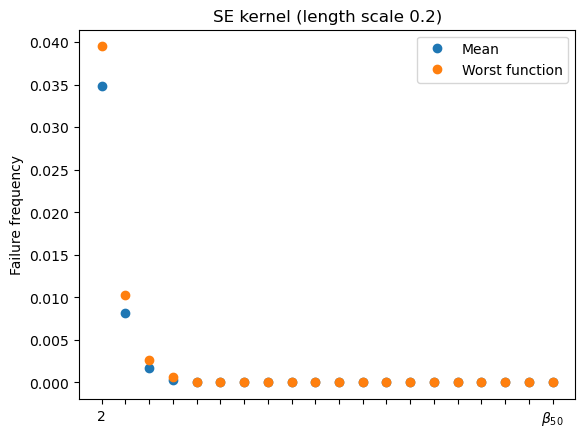

In [7]:
failures_mean_a = np.mean(failures_a, axis=(0,1))
plt.plot(np.arange(20), failures_mean_a, 'o')
worst_a = np.max(np.mean(failures_a, axis=1), axis=0)
plt.plot(np.arange(20), worst_a, 'o')

plt.xticks(ticks=np.arange(20), labels=['2'] + [None]*18 + [r'$\beta_{50}$'])
plt.ylabel("Failure frequency")
plt.title('SE kernel (length scale 0.2)')
_ = plt.legend(['Mean', 'Worst function'])
plt.savefig('figures/figure4_left.pdf')

Matern kernel. The corresponding figures is not included in the supplementary material.

In [8]:
(scalings_b, failures_b) = load_failures_and_scalings('exp_1_2_b/')
scalings_mean_b = np.mean(scalings_b, axis=(0,1))
scalings_var_b = np.var(scalings_b, axis=(0,1))

print('Experiment 1.2 b)\n')
for i in range(4):
    print(f"{i}: {scalings_mean_b[i]:1.2f} +/- {np.sqrt(scalings_var_b[i]):1.2f}\n")

Experiment 1.2 b)

0: 2.00 +/- 0.00

1: 2.30 +/- 0.00

2: 2.61 +/- 0.00

3: 2.91 +/- 0.01



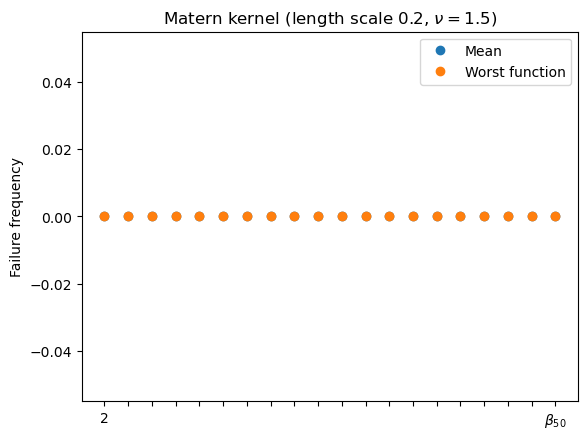

In [9]:
failures_mean_b = np.mean(failures_b, axis=(0,1))
plt.plot(np.arange(20), failures_mean_b, 'o')
worst_b = np.max(np.mean(failures_b, axis=1), axis=0)
plt.plot(np.arange(20), worst_b, 'o')

plt.xticks(ticks=np.arange(20), labels=['2'] + [None]*18 + [r'$\beta_{50}$'])
plt.ylabel("Failure frequency")
plt.title(r'Matern kernel (length scale 0.2, $\nu=1.5$)')
_ = plt.legend(['Mean', 'Worst function'])

SE kernel, functions sampled using the ONB approach.

In [ ]:
(scalings_c, failures_c) = load_failures_and_scalings('exp_1_2_c')
scalings_mean_c = np.mean(scalings_c, axis=(0,1))
scalings_var_c = np.var(scalings_c, axis=(0,1))

print('Experiment 1.2 c)\n')
for i in range(4):
    print(f"{i}: {scalings_mean_c[i]:1.2f} +/- {np.sqrt(scalings_var_c[i]):1.2f}\n")

Experiment 1.2 c)

0: 2.00 +/- 0.00

1: 2.28 +/- 0.00

2: 2.57 +/- 0.00

3: 2.85 +/- 0.01



This figure is shown as Figure 4 (right) in the supplementary material.

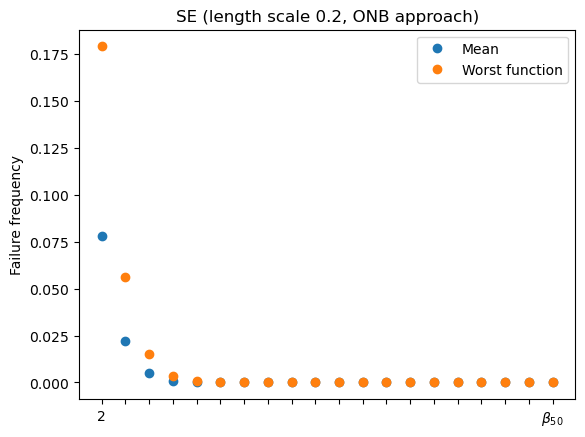

In [18]:
failures_mean_c = np.mean(failures_c, axis=(0,1))
plt.plot(np.arange(20), failures_mean_c, 'o')
worst_c = np.max(np.mean(failures_c, axis=1), axis=0)
plt.plot(np.arange(20), worst_c, 'o')

plt.xticks(ticks=np.arange(20), labels=['2'] + [None]*18 + [r'$\beta_{50}$'])
plt.ylabel("Failure frequency")
plt.title('SE (length scale 0.2, ONB approach)')
_ = plt.legend(['Mean', 'Worst function'])
plt.savefig('figures/figure4_right.pdf')

### Experiment 1.3: Model misspecification, benign setting
The results of this experiment are reported in Table 2, upper row.

In [20]:
(scalings_a, failures_a) = load_failures_and_scalings('exp_1_3_a')
scalings_mean_a = np.mean(scalings_a, axis=(0,1))
scalings_var_a = np.var(scalings_a, axis=(0,1))
failures_a = np.sum(failures_a, axis=(0,1))

print('Experiment 1.3 a)\n')
print(f'Failures: {failures_a}')
for i in range(4):
    print(f"{i}: {scalings_mean_a[i]:1.2f} +/- {np.sqrt(scalings_var_a[i]):1.3f}\n")

Experiment 1.3 a)

Failures: [0. 0. 0. 0.]
0: 6.53 +/- 0.038

1: 6.97 +/- 0.035

2: 7.39 +/- 0.033

3: 7.77 +/- 0.031



### Experiment 1.4: Model misspecification, problematic setting
#### 1.4a) Sampling with standard kernel approach

In [21]:
(scalings_a, failures_a) = load_failures_and_scalings('exp_1_4_a')
scalings_mean_a = np.mean(scalings_a, axis=(0,1))
scalings_var_a = np.var(scalings_a, axis=(0,1))
failures_a = np.sum(failures_a, axis=(1))

print('Experiment 1.4 a)\n')
print('Number of functions with increased failure frequency')
print(np.sum(failures_a/10000 > np.tile(np.array([0.1, 0.01, 0.001, 0.0001]), (50,1)), axis=0))

print('Scalings')
for i in range(4):
    print(f"{i}: {scalings_mean_a[i]:1.2f} +/- {np.sqrt(scalings_var_a[i]):1.2f}\n")

Experiment 1.4 a)

Number of functions with increased failure frequency
[0 0 0 0]
Scalings
0: 6.11 +/- 0.03

1: 6.64 +/- 0.03

2: 7.11 +/- 0.02

3: 7.54 +/- 0.02



#### 1.4b) Sampling with ONB

In [11]:
(scalings, failures) = load_failures_and_scalings('exp_1_4_b')
scalings_mean_b = np.mean(scalings, axis=(0,1))
scalings_var_b = np.var(scalings, axis=(0,1))
failures_b = np.sum(failures, axis=1)

print('Experiment 1.4 b)\n')
print('Number of functions with increased failure frequency')
n_func_reps = 100
print(np.sum(failures_b/10000 > np.tile(np.array([0.1, 0.01, 0.001, 0.0001]), (n_func_reps,1)), axis=0))

print('Scalings')
for i in range(4):
    print(f"{i}: {scalings_mean_b[i]:1.2f} +/- {np.sqrt(scalings_var_b[i]):1.2f}\n")

Experiment 1.4 b)

Number of functions with increased failure frequency
[0 0 1 1]
Scalings
0: 6.96 +/- 0.04

1: 7.41 +/- 0.04

2: 7.82 +/- 0.03

3: 8.20 +/- 0.03



In [12]:
failures.shape

(100, 10000, 4)

#### 1.4c) Robust bound with sampling from ONB

In [4]:
output_dir = 'exp_1_4_c'
files = [f for f in os.listdir(os.path.join(output_dir)) if f.endswith('.npz')]

# All runs have the same config
n_rep_funcs = len(files)
with open(os.path.join(output_dir, files[0]), 'rb') as file:
    result = np.load(file)
    n_rep_training = result['failures'].shape[0]
    n_scalings = result['failures'].shape[1]
    n_eval = result['scalings'].shape[1]

# Load results
failures_c = np.zeros([n_rep_funcs, n_rep_training, n_scalings])
scalings = np.zeros([n_rep_funcs, n_rep_training*4, n_eval])

for i in range(len(files)):
    # with open(os.path.join(output_dir, files[i]), 'rb') as file:
    # with np.load(os.path.join(output_dir, files[i])) as result:
    result = np.load(os.path.join(output_dir, files[i]))
    scalings[i,:] = result['scalings']
    failures_c[i,:] = result['failures']
    del result.f
    result.close()
            
failures_c = np.sum(failures_c, axis=(1))

print('Experiment 1.4 c)\n')
print('Number of functions with increased failure frequency')
print(np.sum(failures_c/10000 > np.tile(np.array([0.1, 0.01, 0.001, 0.0001]), (n_rep_funcs,1)), axis=0))

widths = [scalings[:,i,:] for i in range(4)]

Experiment 1.4 c)

Number of functions with increased failure frequency
[0 0 0 0]


In [5]:
print('Means of uncertainty tube width over input space')
print('(Averaged over all 50 function')
mean_over_inputs = np.array([np.mean(widths_delta, axis=1) for widths_delta in widths])
output = ""
for i in range(4):
    # print(f"{i}: {np.mean(mean_over_inputs[i,:]):1.2f} +/- {np.sqrt(np.var(mean_over_inputs[i,:])):1.3f}\n")
    output += f"${np.mean(mean_over_inputs[i,:]):1.2f}" + " \pm " + f"{np.sqrt(np.var(mean_over_inputs[i,:])):1.2f}$ "
    if i < 3:
        output +=" & "
print(output)

Means of uncertainty tube width over input space
(Averaged over all 50 function
$71.68 \pm 5.36$  & $73.79 \pm 5.36$  & $75.64 \pm 5.37$  & $77.33 \pm 5.37$ 


In [6]:
print('SD of uncertainty tube width over input space')
print('(Averaged over all 50 function')
sd_over_inputs = np.array([np.sqrt(np.var(widths_delta, axis=1)) for widths_delta in widths])
output = ""
for i in range(4):
    #print(f"{i}: {np.mean(sd_over_inputs[i,:]):1.2f} +/- {np.sqrt(np.var(sd_over_inputs[i,:])):1.3f}\n")
    output += f"${np.mean(sd_over_inputs[i,:]):1.2f}" + " \pm " + f"{np.sqrt(np.var(sd_over_inputs[i,:])):1.2f}$ "
    if i < 3:
        output +=" & "
print(output)

SD of uncertainty tube width over input space
(Averaged over all 50 function
$6.54 \pm 1.73$  & $6.73 \pm 1.78$  & $6.91 \pm 1.82$  & $7.06 \pm 1.86$ 
